In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [67]:

# Function to generate a non-isomorphic graph pair with the same number of vertices
def generate_non_isomorphic_graph_pair(base_graph, num_nodes):
    # Generate a non-isomorphic graph with the same number of nodes
    non_iso_graph = nx.gnp_random_graph(num_nodes, 0.5)
    while nx.is_isomorphic(base_graph, non_iso_graph):
        non_iso_graph = nx.gnp_random_graph(num_nodes, 0.5)
        
    return non_iso_graph

In [145]:
# Function to generate a graph pair
def generate_graph_pair(num_nodes, is_isomorphic):
    base_graph = nx.gnp_random_graph(num_nodes, 0.5)  # Generate a random graph

    if is_isomorphic:
        # Generate an isomorphic graph
        perm = list(range(num_nodes))
        random.shuffle(perm)
        iso_graph = nx.relabel_nodes(base_graph, {i: perm[i] for i in range(num_nodes)})
    else:
        # Generate a non-isomorphic graph
        iso_graph = generate_non_isomorphic_graph_pair(base_graph, num_nodes)

    return base_graph, iso_graph, is_isomorphic


In [7]:
def visualize_graph_pair(graph1, graph2, is_isomorphic):
    plt.figure(figsize=(12, 6))
    
    # Plot graph 1
    plt.subplot(121)
    nx.draw(graph1, with_labels=True, font_weight='bold', node_color='skyblue', node_size=5)
    plt.title("Graph 1")

    # Plot graph 2
    plt.subplot(122)
    nx.draw(graph2, with_labels=True, font_weight='bold', node_color='lightgreen', node_size=5)
    plt.title("Graph 2")

    # Show isomorphism status
    plt.suptitle(f"Isomorphic: {is_isomorphic}")

    plt.show()

In [101]:
import networkx as nx
import random
#############################################################
# Function to generate a graph with no isolated vertices
# (i.e. every node has at least one edge)
# Input: number of nodes, edge probability
# Output: a graph
# Example: generate_connected_graph(10, 0.5)
#############################################################
def generate_connected_graph(num_nodes: int, edge_prob: float) -> nx.Graph:
    if num_nodes < 3:
        print("Error: number of nodes must be at least 3")
        return None
    G = nx.gnp_random_graph(num_nodes, edge_prob)
    while min(dict(nx.degree(G)).values()) == 0:  # Check for isolated vertices
        G = nx.gnp_random_graph(num_nodes, edge_prob)
    return G

# Function to generate a graph pair
def generate_graph_pair(num_nodes: str, is_isomorphic: bool, edge_prob=0.5):
    base_graph = generate_connected_graph(num_nodes, edge_prob)  # Generate a random connected graph

    if is_isomorphic:
        # Generate an isomorphic graph
        perm = list(range(num_nodes))
        random.shuffle(perm)
        iso_graph = nx.relabel_nodes(base_graph, {i: perm[i] for i in range(num_nodes)})
    else:
        # Generate a non-isomorphic graph
        iso_graph = generate_non_isomorphic_graph_pair(base_graph, num_nodes, edge_prob)

    return base_graph, iso_graph, is_isomorphic


True


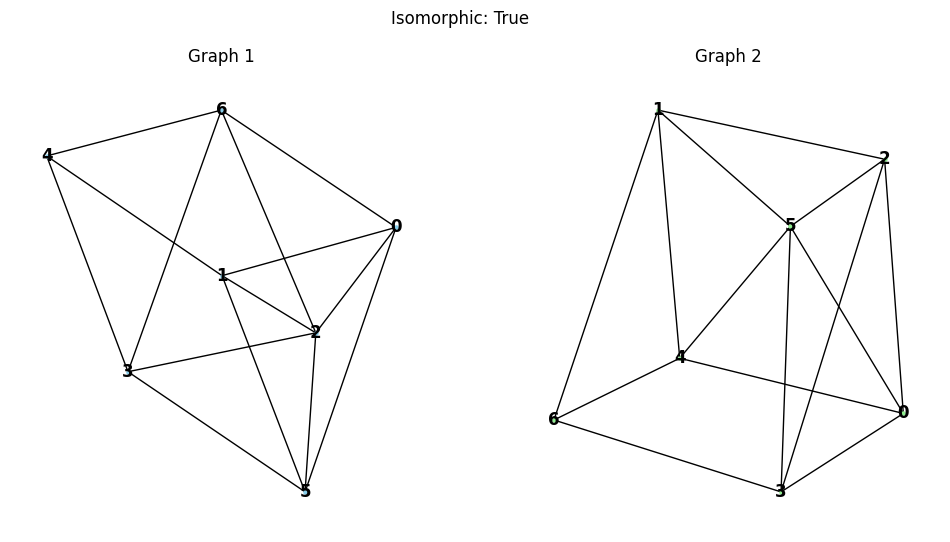

In [118]:
# Generate an example pair of graphs
example_pair = generate_graph_pair(8, True)  # Change to False to generate non-isomorphic pair
graph1, graph2, is_isomorphic = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)

In [121]:
# Implementing the algorithm described for generating isomorphic graphs

def generate_graph_with_permutation(num_nodes, edge_prob):
    # Create an original graph G
    G = nx.gnp_random_graph(num_nodes, edge_prob)

    # Generate a random permutation σ of the vertex set V
    V = list(G.nodes())
    random.shuffle(V)
    permutation = {original: new for original, new in zip(G.nodes(), V)}

    # Create the graph G' with edges E' based on the permutation σ
    G_prime = nx.relabel_nodes(G, permutation)

    return G, G_prime, True


True


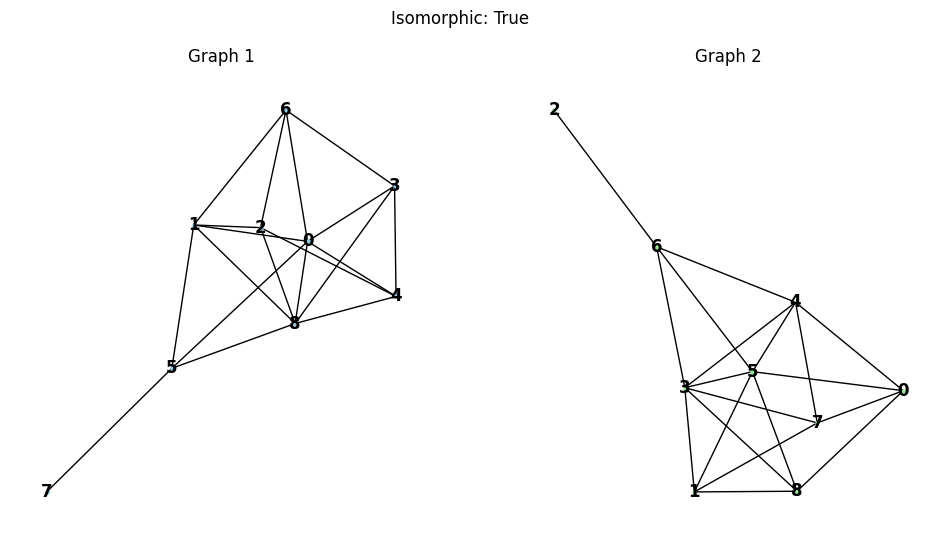

In [138]:
# Generate an example pair of graphs
example_pair = generate_graph_with_permutation(9, 0.5)  # Change to False to generate non-isomorphic pair
graph1, graph2, is_isomorphic = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)

In [139]:
def generate_connected_graph_with_permutation(num_nodes, edge_prob):
    # Create a connected graph G with no isolated vertices
    G = nx.gnp_random_graph(num_nodes, edge_prob)
    while min(dict(nx.degree(G)).values()) == 0:  # Check for isolated vertices
        G = nx.gnp_random_graph(num_nodes, edge_prob)

    # Generate a random permutation σ of the vertex set V
    V = list(G.nodes())
    random.shuffle(V)
    permutation = {original: new for original, new in zip(G.nodes(), V)}

    # Create the graph G' based on the permutation σ
    G_prime = nx.relabel_nodes(G, permutation)

    return G, G_prime, True


True


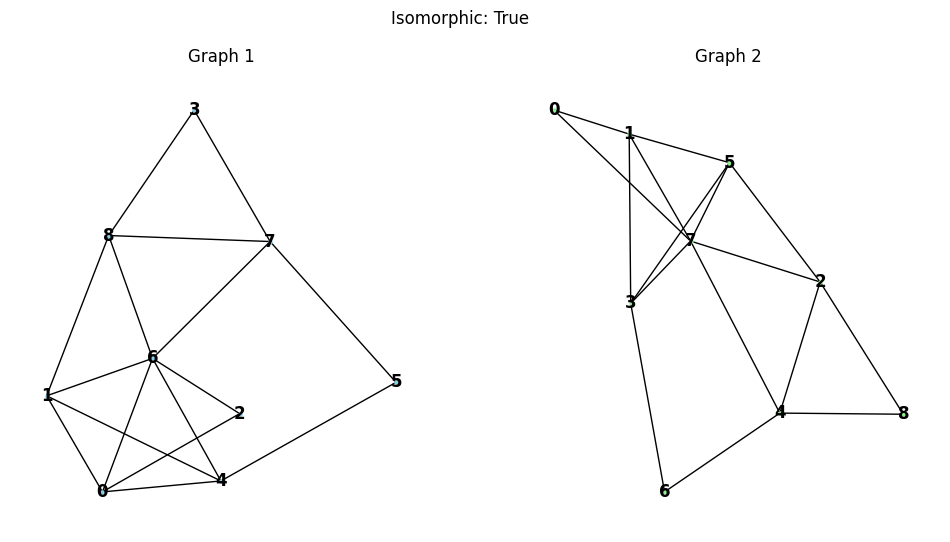

In [143]:
# Generate an example pair of graphs
example_pair = generate_connected_graph_with_permutation(9, 0.5)  # Change to False to generate non-isomorphic pair
graph1, graph2, is_isomorphic = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)

In [24]:
# Encapsulating both isomorphic and non-isomorphic graph generation under one function

def generate_graph_pair(num_nodes, is_isomorphic, num_edges_to_attach=2):
    # Helper function to generate a connected graph using the Barabási-Albert model
    def generate_connected_graph(num_nodes, num_edges_to_attach):
        # The Barabási-Albert model requires the number of edges to attach per new node to be less than the total nodes
        num_edges_to_attach = min(num_edges_to_attach, num_nodes - 1)
        return nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)

    # Generate the base graph
    base_graph = generate_connected_graph(num_nodes, num_edges_to_attach)

    if is_isomorphic:
        # Apply permutation to generate an isomorphic graph
        perm = list(range(num_nodes))
        random.shuffle(perm)
        other_graph = nx.relabel_nodes(base_graph, {i: perm[i] for i in range(num_nodes)})
    else:
        # Generate another connected graph for a non-isomorphic pair
        other_graph = generate_connected_graph(num_nodes, num_edges_to_attach)

    return base_graph, other_graph

# Example usage
num_nodes = 10

# Generate isomorphic and non-isomorphic graph pairs
isomorphic_pair = generate_graph_pair(num_nodes, is_isomorphic=True)
non_isomorphic_pair = generate_graph_pair(num_nodes, is_isomorphic=False)

# Check if they are connected
is_isomorphic_connected = all(nx.is_connected(G) for G in isomorphic_pair)
is_non_isomorphic_connected = all(nx.is_connected(G) for G in non_isomorphic_pair)

is_isomorphic_connected, is_non_isomorphic_connected



(True, True)

False


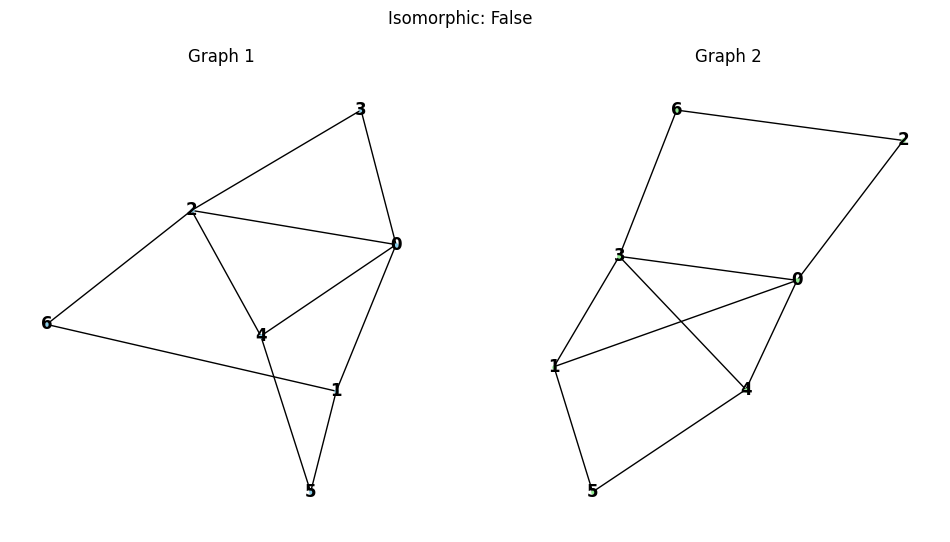

In [47]:
# Generate an example pair of graphs
is_isomorphic = False
example_pair = generate_graph_pair(7, is_isomorphic)  # Change to False to generate non-isomorphic pair
graph1, graph2 = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)

In [ ]:
is_isomorphic = False

for i in range(3,1000):
    # Generate an example pair of graphs
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))
    example_pair = generate_graph_pair(i, is_isomorphic)  # Change to False to generate non-isomorphic pair
    graph1, graph2 = example_pair
    print(nx.is_isomorphic(graph1, graph2))

In [82]:
def generate_non_isomorphic_small_graphs(num_nodes):
    if num_nodes == 3:
        # Create two distinct tree structures
        graph1 = nx.Graph([(0, 1), (1, 2)])
        graph2 = nx.Graph([(0, 1), (0, 2)])
    elif num_nodes == 4:
        # Create one tree and one non-tree structure
        graph1 = nx.Graph([(0, 1), (1, 2), (2, 3)])
        graph2 = nx.Graph([(0, 1), (1, 2), (1, 3)])
    elif num_nodes == 5:
        # Create two different structures
        graph1 = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 4)])
        graph2 = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4)])
    else:
        raise ValueError("This function is only for small graphs with 3 to 5 nodes.")

    return graph1, graph2

def generate_graph_pair(num_nodes, is_isomorphic, num_edges_to_attach=2):
    # For small graphs, handle differently
    if num_nodes in [3, 4, 5] and not is_isomorphic:
        return generate_non_isomorphic_small_graphs(num_nodes)

    # For larger graphs or isomorphic pairs, use the previous method
    base_graph = generate_connected_graph(num_nodes, num_edges_to_attach)

    if is_isomorphic:
        perm = list(range(num_nodes))
        random.shuffle(perm)
        other_graph = nx.relabel_nodes(base_graph, {i: perm[i] for i in range(num_nodes)})
    else:
        other_graph = generate_connected_graph(num_nodes, num_edges_to_attach)

    return base_graph, other_graph



In [105]:
def generate_connected_graph(num_nodes: int, edge_prob: float) -> nx.Graph:
    if num_nodes < 3:
        print("Error: number of nodes must be at least 3")
        return None

    G = nx.gnp_random_graph(num_nodes, edge_prob)

    # Check if the graph is connected; if not, regenerate the graph
    while not nx.is_connected(G):
        G = nx.gnp_random_graph(num_nodes, edge_prob)

    return G


In [106]:
import networkx as nx
import random

def generate_graph_pair(num_nodes, is_isomorphic, num_edges_to_attach=2):
    # Helper function to generate a connected graph using the Barabási-Albert model
    def generate_connected_graph_BA(num_nodes, num_edges_to_attach):
        # The Barabási-Albert model requires the number of edges to attach per new node to be less than the total nodes
        num_edges_to_attach = min(num_edges_to_attach, num_nodes - 1)
        return nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    

    # For small graphs and non-isomorphic pairs, use the special handling
    if num_nodes in [3, 4, 5] and not is_isomorphic:
        # base_graph = generate_connected_graph(num_nodes, 0.5)
        base_graph = generate_connected_graph(num_nodes, 0.5)
        return base_graph, generate_non_isomorphic_graph_pair(base_graph, num_nodes)

    # For larger graphs or isomorphic pairs, use the Barabási-Albert model
    base_graph = generate_connected_graph_BA(num_nodes, num_edges_to_attach)

    if is_isomorphic:
        perm = list(range(num_nodes))
        random.shuffle(perm)
        other_graph = nx.relabel_nodes(base_graph, {i: perm[i] for i in range(num_nodes)})
    else:
        other_graph = generate_connected_graph(num_nodes, num_edges_to_attach)

    return base_graph, other_graph


False


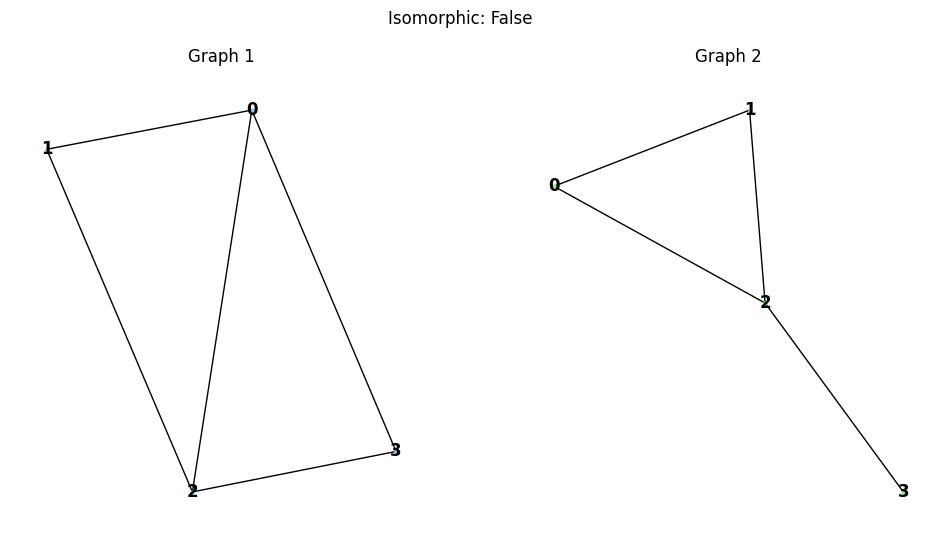

In [109]:
# Generate an example pair of graphs
is_isomorphic = False
example_pair = generate_graph_pair(4, is_isomorphic)  # Change to False to generate non-isomorphic pair
graph1, graph2 = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)